<a href="https://colab.research.google.com/github/opensim-org/CMBBE2024/blob/main/Demo2_OpenSimIKPipeline/Demo%202%20-%20Preview%2C%20Inverse%20Kinematics%20and%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Preview Mocap Data, Inverse Kinematics and Analysis


## 2.1. Objectives


Inverse Kinematics computes the joint angles for a musculoskeletal model that best reproduce the motion of a subject.
In this tutorial, you will:

*   Become familiar with OpenSim's tools to visualize Mocap data.
*   Solve an Inverse Kinematics problem using experimental data.
*   Evaluate/Plot a quantity of interest based on the Inverse Kinematics Solution.

**Format**

Each section of the tutorial guides you through certain tools within OpenSim and asks you to answer a few questions. The questions can be answered based on information from OpenSim and basic knowledge of the human musculoskeletal system. As you complete each section of the tutorial, feel free to explore OpenSim and the lower extremity model further on your own.

## 2.2. Set up Conda and OpenSim

First, set up the environment by executing the following cell (See [Tutorial 1: Introduction to OpenSim in Colab](https://drive.google.com/file/d/1P_2IRJFzdodS1-ce4BsOsC9d8xWXCqXS/view?usp=sharing) for more information).

In [5]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:15
🔁 Restarting kernel...


Don't worry if after executing the previous cell you get an error saying that your session has failed. The reason for this is that condacolab needs to restart the session for the changes to take effect. Because of this, you have to execute the previous cell first, before executing any other cell.

Now, let's install the OpenSim conda package.

In [12]:
!conda install opensim_admin::opensim-moco

Channels:
 - conda-forge
 - opensim_admin
Platform: linux-64
Solving environment: - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



## 2.3. Preview Mocap Data

In this tutorial, you will be using an OpenSim  musculoskeletal model provided by OpenCap .. Detailed information about the model can found on the this page, but first we install the python code/packages needed for visualization

In [2]:
!pip install pygltflib
!conda install -c conda-forge vtk

# Mount OpenSim Viewer code base.
!git clone https://github.com/opensim-org/opensim-viewer-backend.git

# Import the viewport module.
import sys
sys.path.append('opensim-viewer-backend')
import osimViewport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.8 MB/s eta 0:00:00
  Created wheel for pygltflib: filename=pygltflib-1.16.2-py3-none-any.whl size=27300 sha256=b80793a1887c60d717f5b6c090970aec9b2d545ecce9f5fd83a3884c67f361d8
  Stored in directory: /root/.cache/pip/wheels/4a/95/a2/2ee16c602170b0601ebeddbf06597868f09b7dbb0495ae99c4
Successfully built pygltflib
Channels:
 - conda-forge
 - opensim_admin
Platform: linux-64
Solving environment: - \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - 

The visualization works by converting OpenSim's native files into a standard format (.gltf) that's used by the viewer and is universally viewable by other publicly available tools (Blender, 3D Viewer on windows etc.)

**Download Files**

First, let's download the mocap data file (`Squat.trc`). The file is stored in a Google Drive folder (See **Resources** in the Objectives section).

In [6]:
!gdown https://drive.google.com/uc?export=download&id=1FUYgVELqpeme5rxehtIq2zPllxCHvcLp

Downloading...
From: https://drive.google.com/uc?export=download
To: /content/uc?export=download
1.69kB [00:00, 2.91MB/s]


To preview the data, we'll pull in a python module to visualize OpenSim supported files

In [7]:
ovp = osimViewport.osimViewport()
ovp.addDataFile('/content/Squat.trc')
ovp.show()

Download the generated file locally, then drag and drop into the viewer below


In [8]:
# @title Download the generated GLTF file to your computer { display-mode: "form" }
# @markdown After executing this cell, a button will appear to download the generated GLTF file to your computer.

import ipywidgets as widgets
from IPython.display import display
from google.colab import files
layout = widgets.Layout(width='250px')
button = widgets.Button(description="Download the GLTF file!", layout=layout)
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    files.download('/content/Squat.gltf')

button.on_click(on_button_clicked)
display(button, output)

Button(description='Download the GLTF file!', layout=Layout(width='250px'), style=ButtonStyle())

Output()

In [9]:
# @title Execute this cell to include the OpenSim Viewer { display-mode: "form" }
# @markdown Open the downloaded GLTF file from the Opensim Viewer to visualize.

from IPython.display import IFrame

IFrame('https://dev.d7iaa9a9lxtm6.amplifyapp.com/?css=gui', width=600, height=300)

## 2.4. Inverse Kinematics

Kinematics is the study of motion without considering the forces and moments that produce that motion [[4]](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470549148). The purpose of inverse kinematics (IK) is to estimate the joint angles of a particular subject from experimental data. In this section, you will estimate a subject's joint angles during walking by performing an IK analysis using the subject scaled model and experimentally collected walking data.

For each time step of recorded motion data, IK computes a set of joint angles that put the model in a configuration that "best matches" the experimental kinematics. OpenSim determines this "best match" by solving a weighted least squares optimization problem with the goal of minimizing marker error. Marker error is defined as the distance between an experimental marker and the corresponding model marker. Each marker has an associated weighting value, specifying how strongly that marker's error term should be minimized in the least squares problem. For each time step, the inverse kinematics tool solves for a vector of generalized coordinates (e.g., joint angles), $q$, that minimizes the weighted sum of marker errors, which is expressed as:

$\underset{q}{\text{min}}\Bigg[ \sum_{i \in \text{markers}}{w_i || x_i^{\text{exp}} - x_i(q) ||^2}^{}\Bigg] $

where $q$ is the vector of generalized coordinates (e.g., joint angles), $x_i^{\text{exp}}$ is the position of the experimental marker $i$, $x_i(q)$ is the position of the corresponding model marker $i$ (which depends on $q$), and $w_i$ is the weight associated with marker $i$.

A detailed explanation of the Inverse Kinematics Tool can be found on the [Inverse Kinematics page](https://simtk-confluence.stanford.edu:8443/display/OpenSim/Inverse+Kinematics) of the documentation.

**Download the files**

First, let's download the configuration file for the Inverse Kinematics tool.

The first file to download is the xml configuration file (`ik_setup.xml`) for the IK tool. The file is stored in a Google Drive folder (See **Resources** in the Objectives section).

In [ ]:
!gdown https://drive.google.com/uc?export=download&id=1OscIQTShPZDwkr_S-WLvCGpho9Az4Nl4 # ik_setup.xml
!gdown https://drive.google.com/uc?export=download&id=1FUYgVELqpeme5rxehtIq2zPllxCHvcLp # model file

**Create IK Tool**

The IK Tool helps us solve the Inverse Kinematics problem. We can pass a configuration file as a parameter (`subject01_Setup_IK.xml`).

In [14]:
# Create an IK object using the configuration file.
import opensim as osim
inverse_kinematics_tool = osim.InverseKinematicsTool('/content/ik_setup.xml')

# Print some information of the config file to check that everything is correct.
print("Name:", inverse_kinematics_tool.getName())
print("Model File:", inverse_kinematics_tool.get_model_file())
print("Marker File:", inverse_kinematics_tool.get_marker_file())
print("Accuracy:", inverse_kinematics_tool.get_accuracy())
print("Time Range: [", inverse_kinematics_tool.get_time_range(0), ",", inverse_kinematics_tool.get_time_range(1), "]")
print("Constraint Weight:", inverse_kinematics_tool.get_constraint_weight())
print()

# Print weights information
print("Weights:")
task_set = inverse_kinematics_tool.get_IKTaskSet()
for i in range(task_set.getSize()):
  task = task_set.get(i)
  print(task.getName())
  print(task.getWeight())
  print()

Name: 
Model File: LaiArnoldModified2017_poly_withArms_weldHand_scaled.osim
Marker File: Squat.trc
Accuracy: 1e-05
Time Range: [ 0.0 , 7.4333333 ]
Constraint Weight: inf

Weights:
r.ASIS_study
1.0

L.ASIS_study
1.0

r.PSIS_study
1.0

L.PSIS_study
1.0

r_knee_study
1.0

r_mknee_study
1.0

r_ankle_study
1.0

r_mankle_study
1.0

r_toe_study
1.0

r_5meta_study
1.0

r_calc_study
1.0

L_knee_study
1.0

L_mknee_study
1.0

L_ankle_study
1.0

L_mankle_study
1.0

L_toe_study
1.0

L_calc_study
1.0

L_5meta_study
1.0

r_shoulder_study
1.0

L_shoulder_study
1.0

C7_study
1.0

r_lelbow_study
1.0

r_melbow_study
1.0

r_lwrist_study
1.0

r_mwrist_study
1.0

L_lelbow_study
1.0

L_melbow_study
1.0

L_lwrist_study
1.0

L_mwrist_study
1.0

r_thigh1_study
1.0

r_thigh2_study
1.0

r_thigh3_study
1.0

L_thigh1_study
1.0

L_thigh2_study
1.0

L_thigh3_study
1.0

r_sh1_study
1.0

r_sh2_study
1.0

r_sh3_study
1.0

L_sh1_study
1.0

L_sh2_study
1.0

L_sh3_study
1.0

RHJC_study
1.0

LHJC_study
1.0



**Perform Inverse Kinematics**

Finally, we run the IK tool. You can visualize the resulting motion file (`inverse_kinematics.sto`) by associating it to the model.

In [15]:
inverse_kinematics_tool.run()

True

**Visualize IK motion and plot marker errors**

The output file `subject01_ik_marker_errors.sto` provides the markers errors associated with each frame of the generated motion. You can parse this file using a `TableProcessor` and visualize the error obtained per frame.

In [16]:
# Use the TableProcessor to read the motion file.
table = osim.TableProcessor("_ik_marker_errors.sto")
# Process the file.
tableErrors = table.process()
# Print labels for each column.
print(tableErrors.getColumnLabels())

('total_squared_error', 'marker_error_RMS', 'marker_error_max')


We will plot the total squared error, the RMS error for the markers, and the maximum error for the markers. In the next cell you will extract this information from the motion file.


In [17]:
# Get columns we want to plot, and the independent column (Time).
total_squared_error = tableErrors.getDependentColumn('total_squared_error')
marker_error_RMS = tableErrors.getDependentColumn('marker_error_RMS')
marker_error_max = tableErrors.getDependentColumn('marker_error_max')
x_time = tableErrors.getIndependentColumn()

Now, we can plot the error.

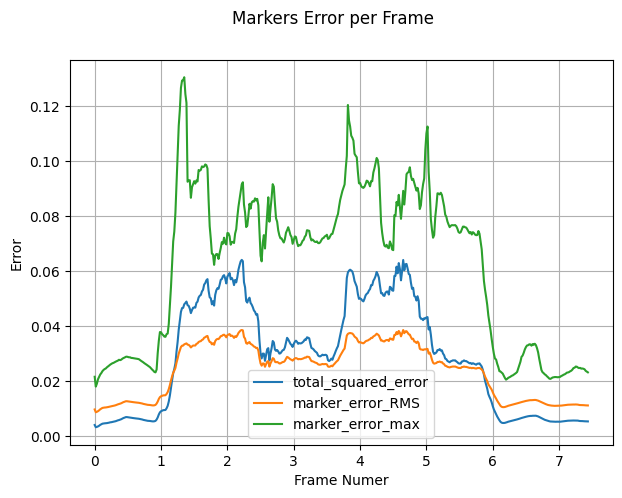

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Markers Error per Frame')

# Plot the knee angles on the first subplot.
axs.plot(x_time, total_squared_error.to_numpy(), label='total_squared_error')
axs.plot(x_time, marker_error_RMS.to_numpy(), label='marker_error_RMS')
axs.plot(x_time, marker_error_max.to_numpy(), label='marker_error_max')
axs.set_xlabel('Frame Numer')
axs.set_ylabel('Error')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

**Questions:**

4. Which markers have weighting values less than one? Why?
Hint: Think about joints that have not been modeled.

5. What is the root-mean-squared (RMS) error of all the markers in the last frame of the motion? Include units. Does this seem reasonable? Explain.

6. What was the value of the maximum marker error in the last frame? Include units. Which marker had this maximum error, and why?
Hint: Think about the weighted least squares problem.

In [19]:
ovp = osimViewport.osimViewport()
ovp.addModelAndMotionFiles('/content/LaiArnoldModified2017_poly_withArms_weldHand_scaled.osim',
                           ['/content/inverse_kinematics.sto'])
ovp.show()

In [20]:
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
layout = widgets.Layout(width='250px')
button = widgets.Button(description="Download the GLTF file!", layout=layout)
output = widgets.Output()

def on_button_clicked(b):
  # Display the message within the output widget.
  with output:
    files.download('/content/LaiArnoldModified2017_poly_withArms_weldHand_scaled.gltf')

button.on_click(on_button_clicked)
display(button, output)

Button(description='Download the GLTF file!', layout=Layout(width='250px'), style=ButtonStyle())

Output()

In [22]:
# @title Execute this cell to include the OpenSim Viewer { display-mode: "form" }
# @markdown Open the downloaded GLTF file from the Opensim Viewer to visualize.

from IPython.display import IFrame

IFrame('https://dev.d7iaa9a9lxtm6.amplifyapp.com/?css=gui', width=600, height=300)

## 2.5. Analyze Motion

Dynamics is the study of motion and the forces and moments that produce that motion [[4]](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470549148). The purpose of Inverse Dynamics is to estimate the forces and moments that cause a particular motion, and its results can be used to infer how muscles are utilized in that motion. To determine these forces and moments, equations of motion for the system are solved iteratively [[5]](https://doi.org/10.1115/1.2834295). The equations of motion are derived using the kinematic description and mass properties of a musculoskeletal model. Then, using the joint angles from Inverse Kinematics and experimental ground reaction force data, the net reaction forces and net moments at each of the joints are calculated such that the dynamic equilibrium conditions and boundary conditions are satisfied [[5]](https://doi.org/10.1115/1.2834295).  

A detailed explanation of the Inverse Dynamics Tool can be found on the [Inverse Dynamics page](https://simtk-confluence.stanford.edu:8443/display/OpenSim/Inverse+Dynamics) of the documentation.

**Download the files**

First, let's download the configuration file (`subject01_Setup_InverseDynamics.xml`) for the Inverse Dynamics tool. The file is stored in a Google Drive folder (See **Resources** in the Objectives section).

In [ ]:
!gdown "1aZJmbykxdTrC_Uo9oDO_9xgfTUmLzjpI&confirm=t" # subject01_Setup_InverseDynamics.xml

The second file is a external loads file (`subject01_walk1_grf.xml`), that contains the external loads applied to the model. The file is stored in a Google Drive folder (See **Resources** in the Objectives section).

In [ ]:
!gdown "14aOk5udB8pgafettraCZgv3ULnAWzvyI&confirm=t" # subject01_walk1_grf.xml

The third file is a coordinates file (`subject01_walk1_grf.mot`), containing coordinate data. The file is stored in a Google Drive folder (See **Resources** in the Objectives section).

In [ ]:
!gdown "1m0PTgw8K1dW0koHhgn6Wfci0498JsGF-&confirm=t" # subject01_walk1_grf.mot

**Create ID Tool**

The ID Tool helps us perform Inverse Dynamics. We can pass a configuration file as a parameter (`subject01_Setup_InverseDynamics.xml`).

In [ ]:
# Create an ID object using the configuration file.
inverse_dynamics_tool = osim.InverseDynamicsTool('subject01_Setup_InverseDynamics.xml')

# Print some information of the config file to check that everything is correct.
print("Name:", inverse_dynamics_tool.getName())
print("Model File:", inverse_dynamics_tool.getModelFileName())
print("External Loads File:", inverse_dynamics_tool.getExternalLoadsFileName())
print("Coordinates File:", inverse_dynamics_tool.getCoordinatesFileName())
print("Time Range: [", inverse_dynamics_tool.getStartTime(), ",", inverse_dynamics_tool.getEndTime(), "]")
print("Lowpass Cutoff Frecuency:", inverse_dynamics_tool.getLowpassCutoffFrequency())
print()

**Run Inverse Dynamics**

Finally, we can run Inverse Dynamics by running the Inverse Dynamics tool.

In [ ]:
inverse_dynamics_tool.run()

**Visualize ID results**

After running the Inverse Dynamics Tool, a file named `inverse_dynamics.sto` is generated. This file contains the results of the Inverse Dynamics execution, and you can parse it using a Table Processor to visualize the results.

In [ ]:
# Use the TableProcessor to read the motion file.
table = osim.TableProcessor("ResultsInverseDynamics/inverse_dynamics.sto")
# Process the file.
tableID = table.process()
# Print labels for each column.
print(tableID.getColumnLabels())

We are going to compare the moments of the ankle angle of both legs, so let's extract them from the Inverse Dynamics results.

In [ ]:
# Get columns we want to represent, and the independent column (Time).
ankle_angle_r_moment = tableID.getDependentColumn('ankle_angle_r_moment')
ankle_angle_l_moment = tableID.getDependentColumn('ankle_angle_l_moment')
x_time = tableID.getIndependentColumn()

Now, we can plot the moments.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Ankle Angle Moment Comparison')

# Plot the knee angles on the first subplot.
axs.plot(x_time, ankle_angle_r_moment.to_numpy(), label='ankle_angle_r_moment')
axs.plot(x_time, ankle_angle_l_moment.to_numpy(), label='ankle_angle_l_moment')
axs.set_xlabel('Time')
axs.set_ylabel('Moment')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In solving the Inverse Dynamics problem, both kinematic data and force plate data were used, making this an over-determined problem. In other words, the problem has more equations than unknowns (i.e., degrees of freedom). Due to errors in the experimental motion data and inaccuracies in the musculoskeletal model, it turns out that Newton's second law is violated, or $\overrightarrow{F}_{\text{exp}} \neq m * \overrightarrow{a}$ [[5]](https://doi.org/10.1115/1.2834295). One method to handle this inconsistency is to compute and apply residual forces and moments to a particular body segment in the model, such that Newton's second law becomes:

$\overrightarrow{F}_{\text{exp}} + \overrightarrow{F}_{\text{residual}} = m * \overrightarrow{a} $

Note: An analogous equation relates the ground reaction moment, $\overrightarrow{M}_{\text{exp}}$ to the residual moment, $\overrightarrow{M}_{\text{residual}}$.

In this musculoskeletal model, the residuals are applied to the pelvis segment. To see the residuals from the inverse dynamics solution, plot `pelvis_tx_force`, `pelvis_ty_force`, and `pelvis_tz_force` versus `time`. Using this plot, answer question 9.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get columns we want to represent, and the independent column (Time).
pelvis_tx_force = tableID.getDependentColumn('pelvis_tx_force')
pelvis_ty_force = tableID.getDependentColumn('pelvis_ty_force')
pelvis_tz_force = tableID.getDependentColumn('pelvis_tz_force')
x_time = tableID.getIndependentColumn()

# Create six subplots, with 2 rows and 3 columns.
fig, axs = plt.subplots(1, 1, figsize=(7, 5))
fig.suptitle('Pelvis Force Residuals')

# Plot the knee angles on the first subplot.
axs.plot(x_time, pelvis_tx_force.to_numpy(), label='pelvis_tx_force')
axs.plot(x_time, pelvis_ty_force.to_numpy(), label='pelvis_ty_force')
axs.plot(x_time, pelvis_tz_force.to_numpy(), label='pelvis_tz_force')
axs.set_xlabel('Time')
axs.set_ylabel('Force')
axs.grid()
axs.legend()

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

**Questions:**

7. On your plot of the ankle moments, identify when heel strike, stance phase, toe off, and swing phase occur for each curve (i.e., left leg and right leg).

8. Based on your plot and the angle convention for the ankle, give an explanation of what is happening at the ankle just before toe-off.
Hint: It may be useful to visualize the motion in the OpenSim GUI and use the Coordinate sliders to understand the angle convention for the ankle.

9. What are the maximum magnitudes of the residual forces? Using the mass of the subject from Question 1, what fraction of body weight are the maximum residual forces?

While applying residual forces and moments makes the model's motion dynamically consistent with the external forces, this strategy is undesirable because the residuals can be large. More advanced strategies have been developed to deal with the problem of residuals and dynamic inconsistencies, such as least-squares optimization [[5]](https://doi.org/10.1115/1.2834295), the Residual Elimination Algorithm (REA) [[6]](https://doi.org/10.1016/j.jbiomech.2005.02.010), and the Residual Reduction Algorithm (RRA) [[7]](https://bcats.stanford.edu/previous_bcats/bcats06/pdf/BCATS_2006_abstract_book.pdf#page=31). OpenSim implements a Residual Reduction Algorithm as part of its workflow for generating muscle-actuated simulations [[7]](https://bcats.stanford.edu/previous_bcats/bcats06/pdf/BCATS_2006_abstract_book.pdf#page=31). A detailed explanation of the Residual Reduction Algorithm (RRA) can be found on the Residual Reduction Algorithm page of the documentation. For additional information on these strategies, please also see [[1]](https://doi.org/10.1080/10255842.2011.627560), [[5]](https://doi.org/10.1115/1.2834295), [[6]](https://doi.org/10.1016/j.jbiomech.2005.02.010) and [[7]](https://bcats.stanford.edu/previous_bcats/bcats06/pdf/BCATS_2006_abstract_book.pdf#page=31).

## 5.6. Conclusion

In this tutorial you have scaled a musculoskeletal model, and then performed an Inverse Kinematics analysis and an Inverse Dynamics analysis to it. Then you have explored the results of the two analyses.

## 5.7. Acknowledgements

The experimental gait data were collected by Jill Higginson and Chand John in the Neuromuscular Biomechanics Lab at the University of Delaware [[8]](https://doi.org/10.1080/10255842.2011.627560). The data include marker trajectories and ground reaction forces for an adult male walking at a self-selected speed on an instrumented split-belt treadmill. Please note that the data distributed with OpenSim is from a different subject than the one described in the paper. Data collection protocols were the same for both subjects.

## 5.8. Useful Links





> **OpenSim Website:** https://opensim.stanford.edu/
>
> **OpenSim API Documentation:** https://simtk.org/api_docs/opensim/api_docs/
>
> **OpenSim Creator Website:** https://opensimcreator.com/
>
> **SimTK Website:** https://simtk.org/projects/opensim
>
> **Biomechanics of Movement's Course:** https://www.youtube.com/channel/UCDNGy0KKNLQ-ztcL5h2Z6zA
>
> **Webinar on Scaling and Inverse Kinematics in OpenSim:** https://www.youtube.com/watch?v=ZG7wzvQC6eU

##5.9 Acknowledgments

The experimental gait data were collected by Jill Higginson and Chand John in the Neuromuscular Biomechanics Lab at the University of Delaware [[8]](https://doi.org/10.1080/10255842.2011.627560). The data include marker trajectories and ground reaction forces for an adult male walking at a self-selected speed on an instrumented split-belt treadmill. Please note that the data distributed with OpenSim is from a different subject than the one described in the paper. Data collection protocols were the same for both subjects.

Thanks to [OpenSimColab](https://simtk.org/projects/opencolab) project [[9]](https://doi.org/10.1080/10255842.2022.2104607) for creating the first OpenSim Conda package.

## 5.10. References


> [1].   Delp, S. L., Anderson, F. C., Arnold, A. S., Loan, P., Habib, A., John, C. T., Guendelman, E., & Thelen, D. G. (2007). **OpenSim: open-source software to create and analyze dynamic simulations of movement.** *IEEE Transactions on Bio-Medical Engineering*, 54(11), 1940–1950. https://doi.org/10.1109/TBME.2007.901024
>
> [2].   Delp, S. L., Loan, J. P., Hoy, M. G., Zajac, F. E., Topp, E. L., & Rosen, J. M. (1990). **An interactive graphics-based model of the lower extremity to study orthopaedic surgical procedures.** *IEEE Transactions on Bio-Medical Engineering*, 37(8), 757–767. https://doi.org/10.1109/10.102791
>
> [3]. Anderson, F. C., & Pandy, M. G. (1999). **A dynamic optimization solution for vertical jumping in three dimensions.** *Computer Methods in Biomechanics and Biomedical Engineering*, 2(3), 201–231. https://doi.org/10.1080/10255849908907988
>
> [4]. Winter, D. A. (1990). **The biomechanics and motor control of human movement** (2a ed.). *John Wiley & Sons*. https://onlinelibrary.wiley.com/doi/book/10.1002/9780470549148
>
> [5]. Kuo, A. D. (1998). **A least-squares estimation approach to improving the precision of inverse dynamics computations.** *Journal of Biomechanical Engineering*, 120(1), 148–159. https://doi.org/10.1115/1.2834295
>
> [6]. Thelen, D. G., & Anderson, F. C. (2006). **Using computed muscle control to generate forward dynamic simulations of human walking from experimental data.** *Journal of Biomechanics*, 39(6), 1107–1115. https://doi.org/10.1016/j.jbiomech.2005.02.010
>
> [7]. John, C.T., Anderson, F.C., Guendelman, E., Arnold, A.S., Delp, S.L. (21st October 2006). **An algorithm for generating muscle-actuated simulations of long-duration movements.** *Biomedical Computation at Stanford (BCATS) Symposium*, Stanford University, Poster Presentation. https://bcats.stanford.edu/previous_bcats/bcats06/pdf/BCATS_2006_abstract_book.pdf#page=31
>
> [8]. John, C. T., Anderson, F. C., Higginson, J. S., & Delp, S. L. (2013). **Stabilisation of walking by intrinsic muscle properties revealed in a three-dimensional muscle-driven simulation.** *Computer Methods in Biomechanics and Biomedical Engineering*, 16(4), 451–462. https://doi.org/10.1080/10255842.2011.627560
>
> [9] Mokhtarzadeh, H., Jiang, F., Zhao, S., & Malekipour, F. (2022). **OpenColab project: OpenSim in Google colaboratory to explore biomechanics on the web.** *Computer Methods in Biomechanics and Biomedical Engineering*, 1–9. https://doi.org/10.1080/10255842.2022.2104607